# Cracking The Sales Code:
## Finding the two best markets to advertise programming courses

![banner](https://techcrunch.com/wp-content/uploads/2015/04/codecode.jpg?w=730&crop=1)

## Abstract

Living in a capitalist society inherently means being able to provide goods and services, and where to aim one's efforts. In this project, we emulate an online programming school which offers web and mobile dev courses. We are asked to identify the 2 best markets (countries) for our advertising campaign based on a survey with new coders from freeCodeCamp in 2018. The four main issues are:

1. how many new coders are interested in our course portfolio?;
2. how big is the city the target group lives in?;
3. which are the most indicated countries to advertise based on potential clients?
4. how many nationals can afford our product (total and relative)?

The results were as follows:

1. 40% of new coders are interested in at least 1 of our five courses;
2. medium cities(37%), big cities(35%), small cities (25%);
3. US(37%), India(13%), UK(4%), Canada(3%);
4. US: 56 (1.38%), Canada:66 (20.69%), India:171 (13.20%), UK:56 (12.99%)

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration, Visualization and Analysis**](#section5)      
6. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>

The ability to sell is one of the hallmakrs of our capitalist society, which has brought over a billion people out of poverty since 1990, according to the world bank. One of the key factors in knowing how to sell is to analyze the viability of your product in different markets.

In this project, we emulate an e-learning company on programming courses. Most courses are on web and mobile development, but we also cover Data Science, Game development, etc. Our company would like to advertise its products, investing some money in marketing campaings. Our objective is to discover the two best markets to advertise in.

Instead of organizing surveys in different markets, which would be too costly, we decide to search for existing data that might aid our purpose. We find an interesting candidade in [freeCodeCamp's 'The 2018 New Coder Survey'](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). Because this free e-learning platform runs a [popular Medium publication](https://www.freecodecamp.org/news/) their survey is attractive for coders with varying interests, serving as a good proxy for our analysis.

## 2. Goals and limitations<a name="section2"></a>

Our objective is to discover the two best markets to advertise in. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located
* What locations have the most new coders
* How much money new coders are willing to spend on learning?
* Where are most costumers who can afford our product at?

Limitations:

* In our analysis, we consider only countries with english as a Native language, despite them also being the 4 more popular in the survey. In the end, what we care for is how many costumers can afford our product, and considering programming is already english-based, we should use the financial threshold instead of the cultural one.


## 3. Methodology<a name="section3"></a>

We will proceed to analyze the data with pandas dataframes, trying to spot patterns, common qualifiers and outliers with visualization tools (mostly bar charts from matplotlib and boxplots from seaborn).


## 4. Metadata<a name="section4"></a>

More than 31000 people responded to this survey, constituded by more than 50 questions. These are who have been coding for less than 5 years.

Some high level facts:
* 2/3 of them live outside the US
* their median age is 30
* 21% are women
* 25% identifies as being part of an ethnic minority in their country
* 8% are military veterans
* They have been coding for 21 months
* 17% have already landed their first developer job

The data is available at a [public Github repository](https://github.com/freeCodeCamp/2018-new-coder-survey)


A data dictionary was not provided with the dataset, but the questions are straight forward and easy to grasp.

## 5. Data Exploration and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#sns.set(style='darkgrid')


pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

survey = pd.read_csv('2018_coder_survey.csv')

1. Try to find relevant columns for our analysis
2. Data type
3. missing/duplicate values
4. reasonableness/unwanted rows

In [2]:
survey.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31226 entries, 0 to 31225
Data columns (total 136 columns):
 #    Column                                                                                                          Non-Null Count  Dtype  
---   ------                                                                                                          --------------  -----  
 0    #                                                                                                               31226 non-null  object 
 1    Are you already working as a software developer?                                                                30844 non-null  float64
 2    Is this your first software development job?                                                                    5037 non-null   float64
 3    Before you got this job, how many months did you spend looking for a job?                                       4897 non-null   float64
 4    Would you prefer to...          

In [3]:
survey.head()#5-9, #9-19

,#,Are you already working as a software developer?,Is this your first software development job?,"Before you got this job, how many months did you spend looking for a job?",Would you prefer to...,Full-Stack Web Developer,Back-End Web Developer,Front-End Web Developer,Mobile Developer,DevOps / SysAdmin,Data Scientist,Teacher / Trainer / Developer Evangelist,Quality Assurance Engineer,User Experience Designer,Product Manager,Game Developer,Information Security,Data Engineer,Other,When do you plan to start applying for developer jobs?,About how much money do you expect to earn per year at your first developer job (in US Dollars)?,Would you prefer to work...,Are you willing to relocate for a job?,What is your biggest reason for learning to code?,Other.1,freeCodeCamp,Mozilla Developer Network (MDN),Stack Overflow,EdX,Coursera,Khan Academy,Pluralsight,Codecademy,Udacity,Udemy,Code Wars,Treehouse,HackerRank,Front End Masters,Lynda.com,Egghead.io,CSS Tricks,Other.2,freeCodeCamp study groups,hackathons,conferences,workshops,Startup Weekend,NodeSchool,Women Who Code,Girl Develop It,CoderDojo,Meetup.com events,RailsBridge,Game Jam,Rails Girls,Django Girls,weekend bootcamps,Other.3,The freeCodeCamp Podcast,Code Newbie,The Changelog,Software Engineering Daily,JavaScript Jabber,Syntax.fm,Learn To Code With Me,Full Stack Radio,Front End Happy Hour,Coding Blocks,Shop Talk Show,Developer Tea,Programming Throwdown,Geek Speak,Hanselminutes,Talk Python To Me,Ruby Rogues,CodePen Radio,Software Engineering Radio,Other.4,MIT Open Courseware,freeCodeCamp's YouTube channel,Computerphile,DevTips,CS Dojo,Engineered Truth,LearnCode.Academy,LevelUpTuts,Fun Fun Function,Coding Tutorials 360,Coding Train,Derek Banas,Simplilearn,Simple Programmer (Bulldog Mindset),Mozilla Hacks,Google Developers,Other.5,About how many hours do you spend learning each week?,About how many months have you been programming for?,Have you attended a full-time coding bootcamp?,Which one?,Have you finished yet?,Did you take out a loan to pay for the bootcamp?,"Based on your experience, would you recommend this bootcamp to your friends?","Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?",How old are you?,What's your gender?,Other.6,Which country are you a citizen of?,Which country do you currently live in?,About how many people live in your city?,Are you an ethnic minority in your country?,Which language do you you speak at home with your family?,What's the highest degree or level of school you have completed?,What was the main subject you studied in university?,What's your marital status?,Do you financially support any dependents?,Do you have children?,How many children do you have?,Do you financially support any elderly relatives or relatives with disabilities?,Do you have any debt?,Do you have a home mortgage?,About how much do you owe on your home mortgage (in US Dollars)?,Do you have student loan debt?,About how much do you owe in student loans (in US Dollars)?,"Regarding employment status, are you currently...",Other.7,Which field do you work in?,About how much money did you make last year (in US dollars)?,About how many minutes does it take you to get to work each day?,Do you consider yourself under-employed?,Have you served in your country's military before?,Do you receive disability benefits from your government?,Do you have high speed internet at your home?,Start Date (UTC),Submit Date (UTC),Network ID
0,daa5a89d67d6028fd3d9dac2d90164fa,0.0,NaN,NaN,work for a startup,Full-Stack Web Developer,NaN,Front-End Web Developer,Mobile Developer,NaN,NaN,NaN,NaN,User Experience Designer,NaN,NaN,NaN,NaN,NaN,I'm already applying,70000.0,in an office with other developers,1.0,To change careers,NaN,freeCodeCamp,Mozilla Developer Network (MDN),Stack Overflow,NaN,NaN,NaN,NaN,NaN,Udacity,NaN,Code Wars,Treehouse,NaN,NaN,NaN,NaN,CSS Tricks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meetup.com events,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
survey.describe(include='all')

,#,Are you already working as a software developer?,Is this your first software development job?,"Before you got this job, how many months did you spend looking for a job?",Would you prefer to...,Full-Stack Web Developer,Back-End Web Developer,Front-End Web Developer,Mobile Developer,DevOps / SysAdmin,Data Scientist,Teacher / Trainer / Developer Evangelist,Quality Assurance Engineer,User Experience Designer,Product Manager,Game Developer,Information Security,Data Engineer,Other,When do you plan to start applying for developer jobs?,About how much money do you expect to earn per year at your first developer job (in US Dollars)?,Would you prefer to work...,Are you willing to relocate for a job?,What is your biggest reason for learning to code?,Other.1,freeCodeCamp,Mozilla Developer Network (MDN),Stack Overflow,EdX,Coursera,Khan Academy,Pluralsight,Codecademy,Udacity,Udemy,Code Wars,Treehouse,HackerRank,Front End Masters,Lynda.com,Egghead.io,CSS Tricks,Other.2,freeCodeCamp study groups,hackathons,conferences,workshops,Startup Weekend,NodeSchool,Women Who Code,Girl Develop It,CoderDojo,Meetup.com events,RailsBridge,Game Jam,Rails Girls,Django Girls,weekend bootcamps,Other.3,The freeCodeCamp Podcast,Code Newbie,The Changelog,Software Engineering Daily,JavaScript Jabber,Syntax.fm,Learn To Code With Me,Full Stack Radio,Front End Happy Hour,Coding Blocks,Shop Talk Show,Developer Tea,Programming Throwdown,Geek Speak,Hanselminutes,Talk Python To Me,Ruby Rogues,CodePen Radio,Software Engineering Radio,Other.4,MIT Open Courseware,freeCodeCamp's YouTube channel,Computerphile,DevTips,CS Dojo,Engineered Truth,LearnCode.Academy,LevelUpTuts,Fun Fun Function,Coding Tutorials 360,Coding Train,Derek Banas,Simplilearn,Simple Programmer (Bulldog Mindset),Mozilla Hacks,Google Developers,Other.5,About how many hours do you spend learning each week?,About how many months have you been programming for?,Have you attended a full-time coding bootcamp?,Which one?,Have you finished yet?,Did you take out a loan to pay for the bootcamp?,"Based on your experience, would you recommend this bootcamp to your friends?","Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?",How old are you?,What's your gender?,Other.6,Which country are you a citizen of?,Which country do you currently live in?,About how many people live in your city?,Are you an ethnic minority in your country?,Which language do you you speak at home with your family?,What's the highest degree or level of school you have completed?,What was the main subject you studied in university?,What's your marital status?,Do you financially support any dependents?,Do you have children?,How many children do you have?,Do you financially support any elderly relatives or relatives with disabilities?,Do you have any debt?,Do you have a home mortgage?,About how much do you owe on your home mortgage (in US Dollars)?,Do you have student loan debt?,About how much do you owe in student loans (in US Dollars)?,"Regarding employment status, are you currently...",Other.7,Which field do you work in?,About how much money did you make last year (in US dollars)?,About how many minutes does it take you to get to work each day?,Do you consider yourself under-employed?,Have you served in your country's military before?,Do you receive disability benefits from your government?,Do you have high speed internet at your home?,Start Date (UTC),Submit Date (UTC),Network ID
count,31226,30844.000000,5037.000000,4897.000000,25739,7934,5420,6983,4767,2118,3895,1763,1253,3014,1750,3903,3153,2836,561,15476,13851.000000,15481,12027.000000,14636,612,19487,8223,14380,4961,5752,5753,2302,12620,5459,11141,2365,2242,3200,748,3398,958,5465,2735,2229,2492,2104,2576,609,483,607,341,503,2682,107,414,148,292,806,3278,3066,1711,270,753,1077,1013,1415,693,594,752,268,585,398,403,189,1113,193,674,430,3015,4290,7210,2119,2761,3698,1140,3417,1571,1491,1785,2236,2181,493,1316,917,4795,3454,28394.000000,28

The users id ('#') could be simplified to row ordinals. 

Column 3 max value is absurdly wrong.
Sth wrong with 117 max values?: "How many children do you have?" 1.000000e+17

From integer to boolean: 1,2, 22, 98, 100:103, 110, 115, 116, 118:121, 122, 130:133

"How much money so far": 103
"What is your gender?" : 105 -> 'Male' -> str to bool
"About how many people live in your city?" : 109 -> 'more than 1 million citizens; -> str to bool
"About how many minutes does it take you to get to work each day?": 128 -> 'Up to how many minutes...' -> str to int

From string to boolean: 5:18, 25:42, 43:58, 59:78, 79:95, 

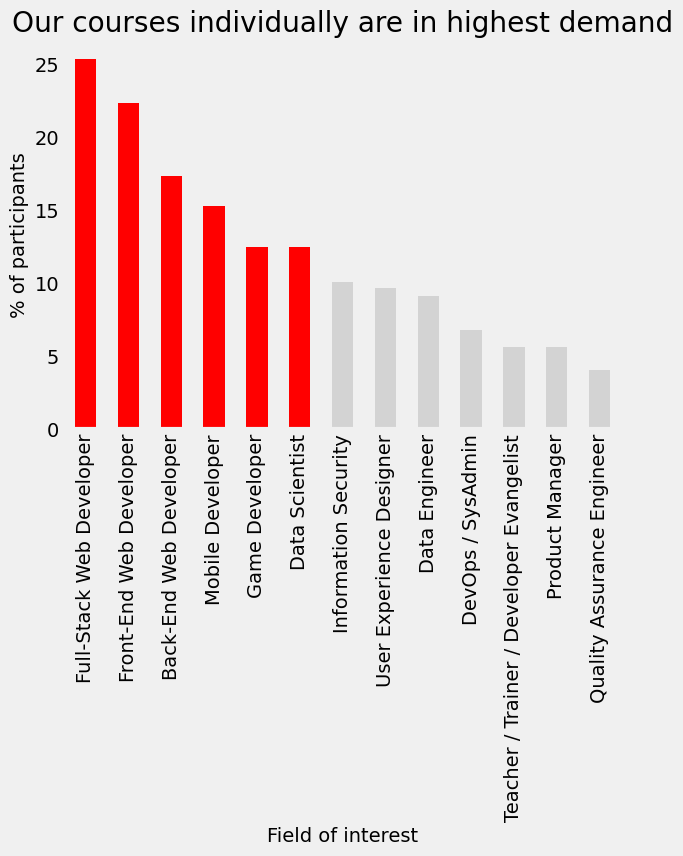

In [5]:
role_interest = (survey.describe(include='all').iloc[3, 5:18]*100)/len(survey)
role_interest.sort_values(ascending=False).plot.bar(grid=False, color=['r','r','r','r','r','r','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray'])
#web and mobile development, but we also cover Data Science, Game development
plt.ylabel('% of participants')
plt.xlabel('Field of interest')
plt.title('Our courses individually are in highest demand')
plt.show()

So people can clearly be interested in more than one subject. The topics our company focuses on are all top 5 in the data, which is apparently positive for our company. Let's compare with how many chose at least one course from our menu versus those who did not.

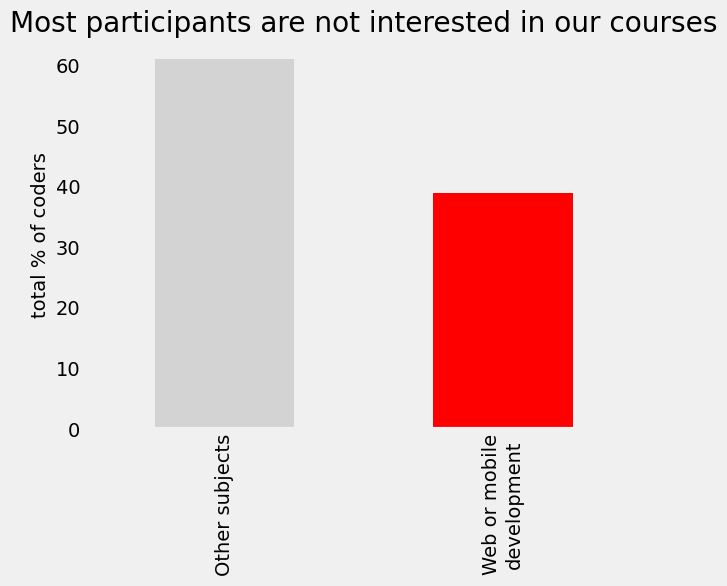

In [6]:
#'JobRoleInterest' 
##5-9, #9-19
#web_mob=[5:]
fields = survey.iloc[5:18]
web_mob = survey.iloc[:,5:9].any(axis=1)
#others = survey.iloc[:, 5:9].none(axis=1)
(web_mob.value_counts(dropna=False, normalize=True)*100).plot.bar(color=['lightgray', 'r'], grid=False)
plt.title('Most participants are not interested in our courses')
plt.ylabel('total % of coders')
plt.xticks([0,1], ['Other subjects', 'Web or mobile\ndevelopment'])
plt.show()


Despite having the most popular courses, our menu is still not enough to satisfy the majority of the market (our portfolio attracts roughly 40% of students), so it is a management decision whether to include other courses that will bring less bang for our buck compared to the ones we already have.

However, we still need to change the data type from the courses columns.
1. Change data type to simplest version possible: bool

In [7]:
survey_r = survey.copy()
job_roles = list(survey_r.iloc[:, 5:18].columns)
for role in job_roles:
    survey_r[role] = survey_r[role]==role
    
survey_r[job_roles].head()


,Full-Stack Web Developer,Back-End Web Developer,Front-End Web Developer,Mobile Developer,DevOps / SysAdmin,Data Scientist,Teacher / Trainer / Developer Evangelist,Quality Assurance Engineer,User Experience Designer,Product Manager,Game Developer,Information Security,Data Engineer
0,True,False,True,True,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,True,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False


### Location and densities

Consider only CountryLive, column 108. Considering each country a market, we can frame our goals as finding the two top countries to publicize in.

What is a good market? - Potential costumers (bigger markets), willingness to invest

In [8]:
survey_int = survey_r[web_mob]

In [9]:
# interested.iloc[:, 108].value_counts(dropna=False) 
survey_int.iloc[:, 108].value_counts(dropna=False)

top_countries_abs = survey_int.iloc[:, 108].value_counts()
top_countries_pct = survey_int.iloc[:, 108].value_counts(normalize=True, dropna=True)*100
pd.DataFrame(data = {'Absolute Frequency': top_countries_abs, '%': round(top_countries_pct, 2)})

,Absolute Frequency,%
United States of America,4454,37.84
India,1563,13.28
United Kingdom,473,4.02
Canada,356,3.02
Nigeria,304,2.58
Brazil,231,1.96
Russia,230,1.95
Germany,209,1.78
Poland,158,1.34
Australia,155,1.32


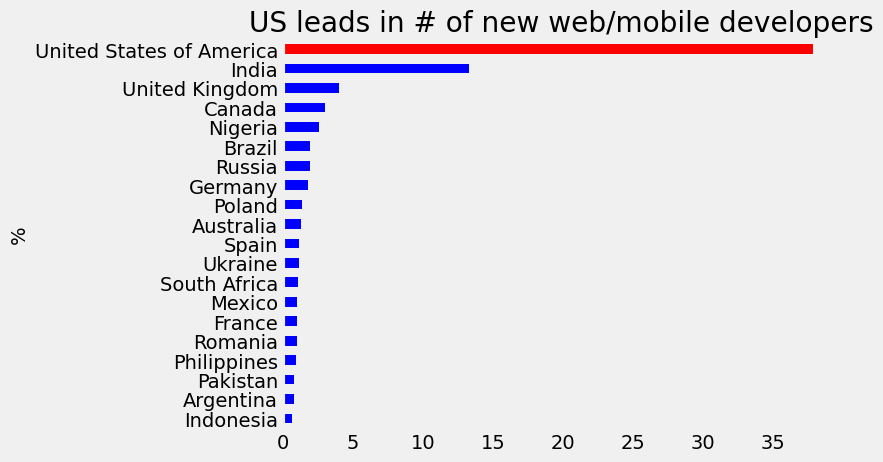

In [10]:
# top_countries_abs = survey_int.iloc[:, 108].value_counts()
top_countries_pct = survey_int.iloc[:, 108].value_counts(normalize=True, dropna=True, ascending=True)*100
top_countries_pct.tail(20).plot(kind='barh', color=['b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','r'], grid=False)
plt.ylabel('%')
plt.title('US leads in # of new web/mobile developers')
plt.show()
# pd.DataFrame(data = {'Absolute Frequency': top_countries_abs, '%': round(top_countries_pct, 2)})

By potential consumers, the best countries in the dataset are undoubtedly the United States and India. We need to take into consideration, however, the average willingness to spend on education. Since our company charges $ 59/month, we will consider the total amount spent to date (column 103), and how long have they been trying to learn (column 97).

We'll narrow down to the top 4 countries in the frequency table: they top the list, and they speak English, the company's products' language.

In [11]:
top_countries_pct2 = survey_int.iloc[:, 108].value_counts(normalize=True, dropna=True)*100
best_countries = top_countries_pct2[:4].index.to_list()
best_countries

['United States of America', 'India', 'United Kingdom', 'Canada']

In [12]:
survey_spent = survey_int.copy()#.iloc[:,108] (which country do you currently live in)
survey_spent.iloc[:, 97].replace({0: 1}, inplace=True)
survey_spent['avg_spent_month'] = survey_spent.iloc[:, 103]/survey_spent.iloc[:, 97]

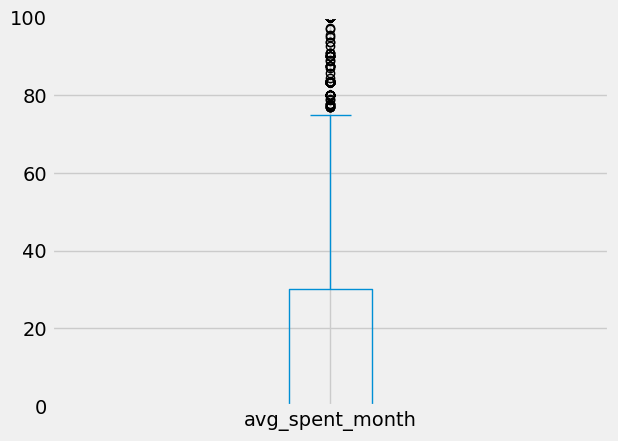

In [13]:
survey_spent['avg_spent_month'].plot(kind='box')
plt.ylim([0,100])
plt.ylabel
plt.show()#.value_counts(normalize=True, dropna=False)

The general boxplot for monthly investment in coding is somewhat discouraging: over 75% of the market spends less than our monthly fee, but we'll continue to dig down the data by country, to see if we find better averages.

In [14]:
survey_ready = survey_spent[survey_spent['avg_spent_month'].notnull()]
survey_ready2 = survey_ready[survey_ready.iloc[:, 108].isin(best_countries)]
survey_final = survey_ready2[survey_ready2.iloc[:, 108].notnull()]
grouped_final = survey_final.pivot_table('avg_spent_month', 'Which country do you currently live in?' )
grouped_final

,avg_spent_month
Which country do you currently live in?,
Canada,153.146563
India,258.881771
United Kingdom,935.735150
United States of America,207.189455


The average spent monthly seems drastically off for the UK. We generate a chart for all 4 distributions, hoping to find outliers to explain the drastic differences.

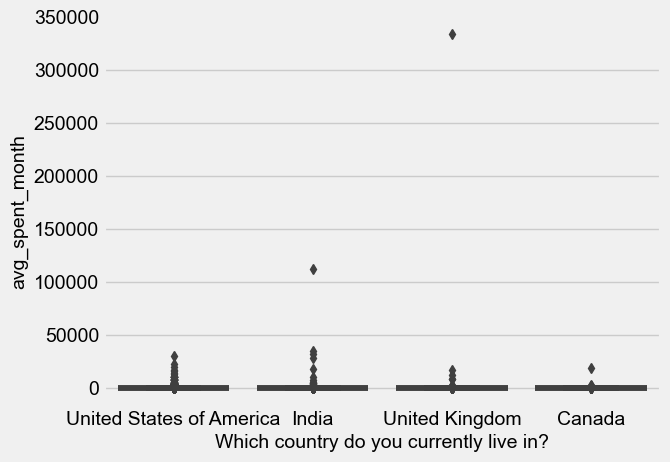

In [15]:
sns.boxplot(x='Which country do you currently live in?', y='avg_spent_month', data=survey_final)
sns.set(rc={'figure.figsize':(22,10)})
plt.show()

US, India and the UK have extreme outliers that are tilting their average numbers. How did anyone spend 350k dollars per month? Let's exclude these initial discrepancies, considering for the most expensive bootcamps in 2018, which might cost 20.000 dollars/month, maximum.

In [16]:
survey_no_extremes = survey_final[survey_final['avg_spent_month']<20000]

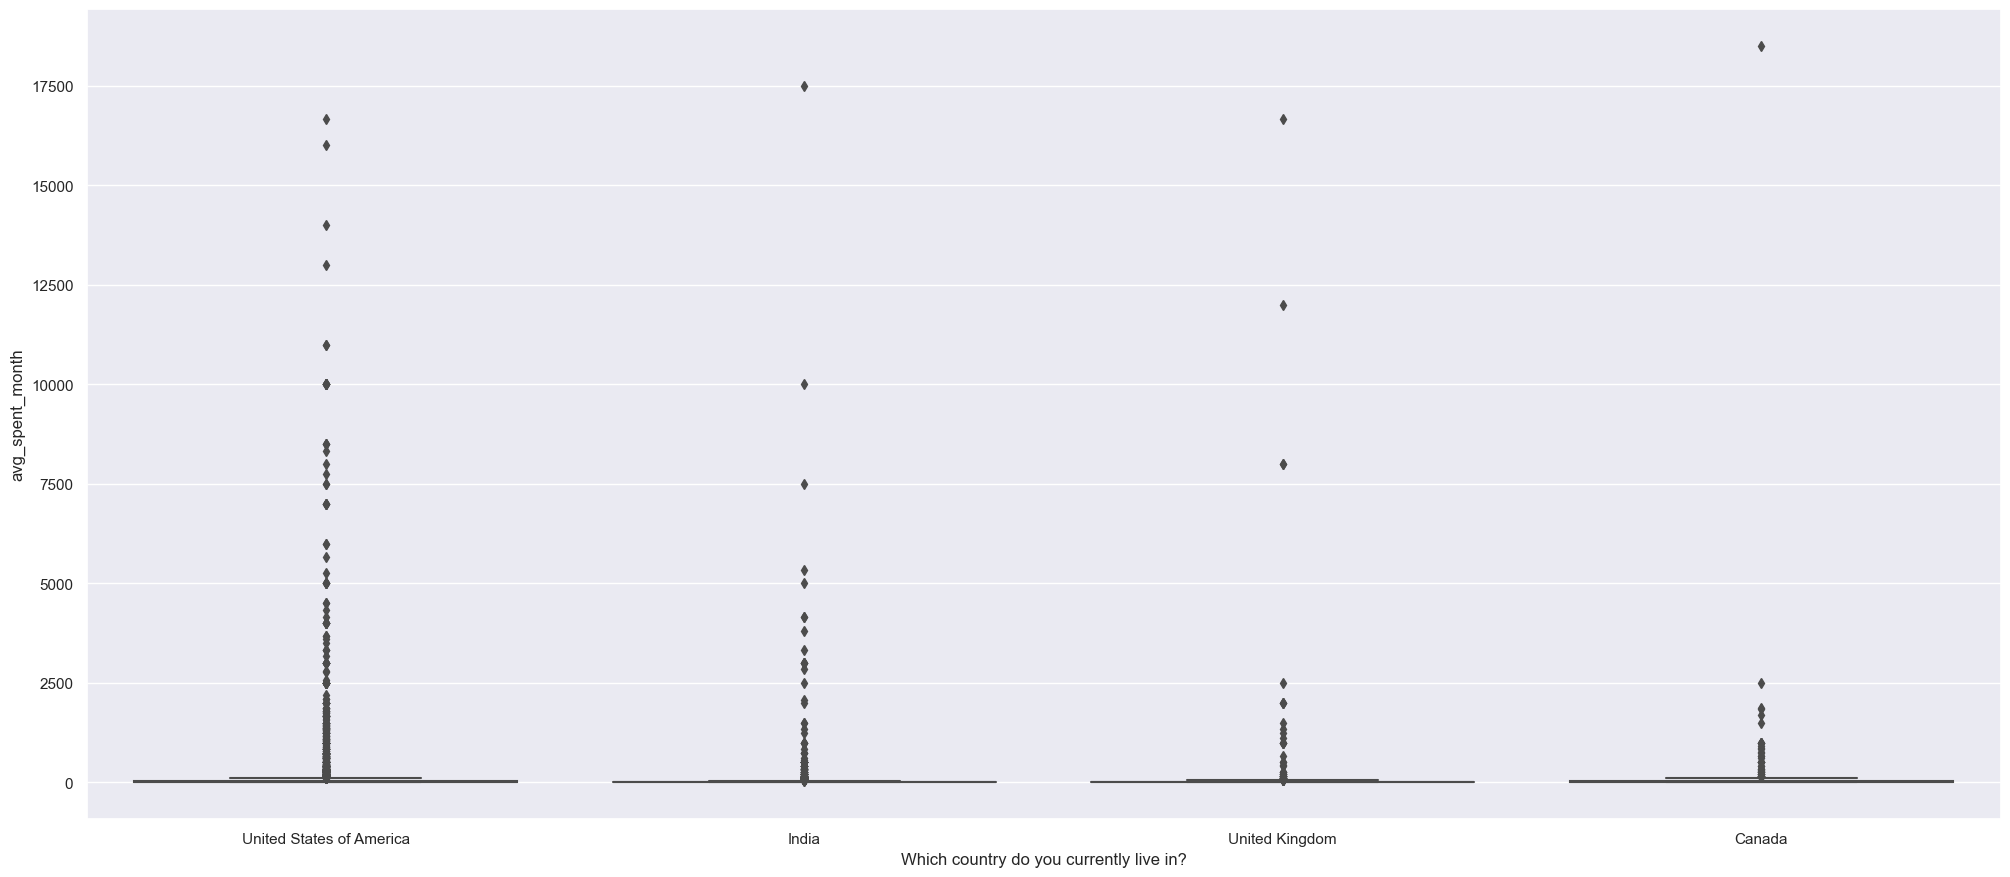

In [17]:
sns.boxplot(x='Which country do you currently live in?', y='avg_spent_month', data=survey_no_extremes)
sns.set(rc={'figure.figsize':(22,10)})
plt.show()

We should drop outliers that are not due to bootcamps. We can see graphically, the thresold for a new set of outliers is 2500 dollars

In [18]:
len(survey_no_extremes)

6130

In [19]:
# to_drop = survey_no_extremes[(survey_no_extremes['avg_spent_month']>2000)&(survey_no_extremes['Have you attended a full-time coding bootcamp?']==0)]
# len(to_drop)
to_drop = (survey_no_extremes['avg_spent_month']>2500)&(survey_no_extremes['Have you attended a full-time coding bootcamp?']==0)
sum(to_drop)

41

In [20]:
survey_correct = survey_no_extremes[~to_drop]
len(survey_correct)

6089

In [21]:
grouped_final2 = survey_correct.pivot_table('avg_spent_month', 'Which country do you currently live in?')
grouped_final2

,avg_spent_month
Which country do you currently live in?,
Canada,153.146563
India,44.111355
United Kingdom,128.012343
United States of America,146.855255


The monthly payments now are somewhat more proportional to what is expected according to GDP.

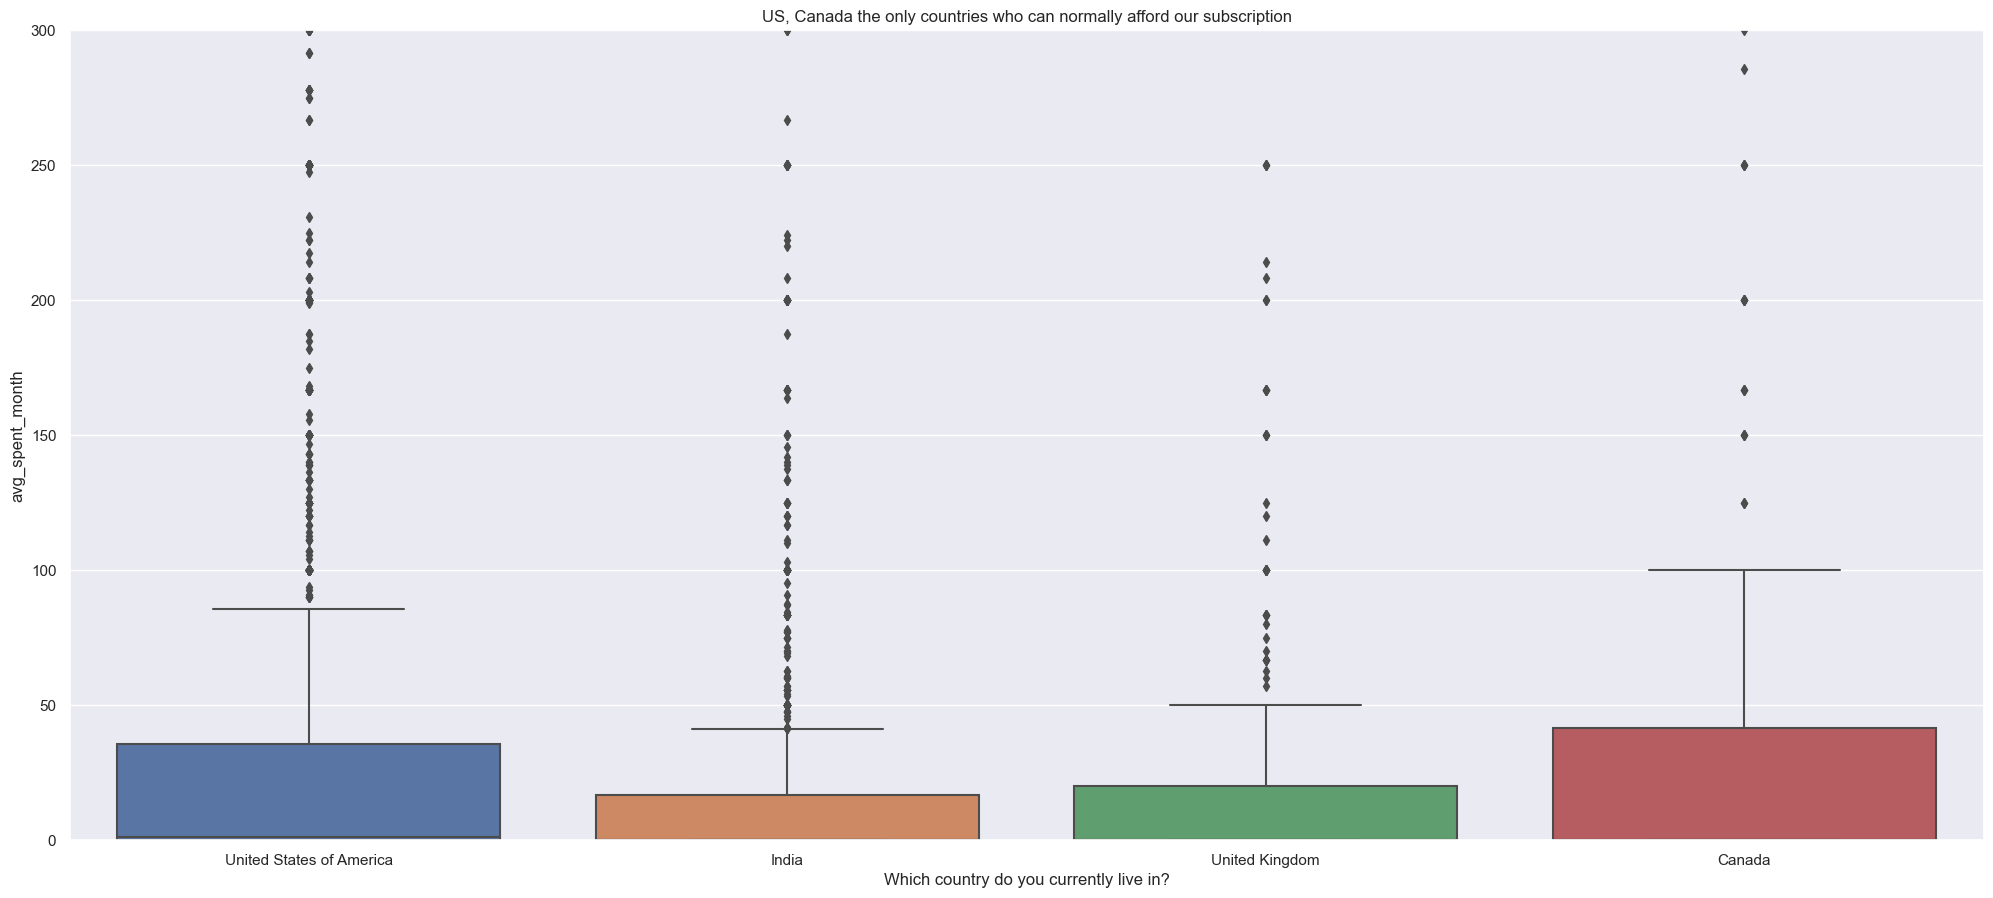

In [22]:
sns.boxplot(x='Which country do you currently live in?', y='avg_spent_month', data=survey_correct)
sns.set(rc={'figure.figsize':(22,10)})
plt.ylim([0,300])
plt.title('US, Canada the only countries who can normally afford our subscription')
plt.show()

Even considering only the best countries to advertise on, over 75% of all markets are below our monthly fee. This is because there are so many free programs these days. Graphically, it seems that only Canada and the US can normally afford our subscription, but how many cases does that amount to? Let's look at absolute numbers of costumers who can pay our fees, and how they compare proportionally to the number of surveeys.

In [23]:
india = survey_correct[survey_correct.iloc[:, 108]=='India']
canada = survey_correct[survey_correct.iloc[:, 108]=='Canada']
uk = survey_correct[survey_correct.iloc[:, 108]=='United Kingdom']
us = survey_correct[survey_correct.iloc[:, 108]=='United States of America']
good_can = len(canada[canada['avg_spent_month']>59])
good_ind = len(india[india['avg_spent_month']>59])
good_uk = len(uk[uk['avg_spent_month']>59])
good_us = len(uk[uk['avg_spent_month']>59])
rate_able_us = round(good_us*100/len(us), 2)
rate_able_can = round(good_can*100/len(canada), 2)
rate_able_ind = round(good_ind*100/len(india), 2)
rate_able_uk = round(good_uk*100/len(uk), 2)

compiled = pd.DataFrame(data = {'% of pop can afford': [rate_able_us, rate_able_can, rate_able_ind, rate_able_uk], 'total pop can afford': [good_us, good_can, good_ind, good_uk]}, index=['US', 'Canada', 'India', 'UK'])
# print('At rate: ')
# print(f'{rate_able_us}', f'{rate_able_ind}', f'{rate_able_can}', f'{rate_able_uk}')
# print('-----\nAt total numbers: ')
# print(f'{good_us}', f'{good_ind}', f'{good_can}', f'{good_uk}')

compiled


,% of pop can afford,total pop can afford
US,1.38,56
Canada,20.69,66
India,13.20,171
UK,12.99,56


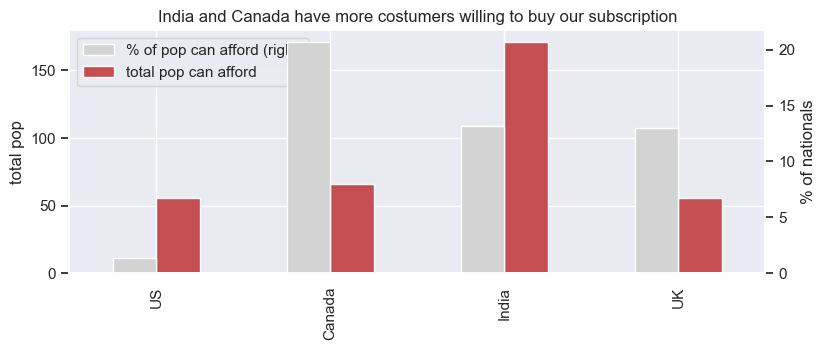

In [24]:
compiled.plot(kind='bar', secondary_y='% of pop can afford', figsize=(8,3), color=['lightgray', 'r'])
ax1, ax2 = plt.gcf().get_axes()
plt.title('India and Canada have more costumers willing to buy our subscription')
ax1.set_ylabel('total pop')
ax2.set_ylabel('% of nationals')
plt.show()

So, despite presenting the worst populational distribution, the number of potential clients in India is still greater than the UK, US and Canada. So this leaves us at the given position:

* If advertisements costs are proportional to how many customers they reach, than I'd recommend we focus on Canada, India, the UK, and the US. This is the descending order of the concentration of costumers who can afford our product found in these countries, assuming the sampling by country in this survey is representative.

* If advertisement costs are fixed and guaranteed to reach the whole population, than the best call would be to invest in India, Canada, than US/UK tied at 3rd. This is the descending order of how many costumers can afford our product in those markets, if we consider the proportion of coders' nationality in this survey representative of the global population of coders.

On the other hand, it makes sense to advertise in other countries as well, because being a recognized brand in different places is itself a form of marketing, which can lead to more revenue due to mouth to mouth recomendations, for example. Our company must be in different markets if it eventually wants to grow in them, and we can always taylor our fee to each market later on, especially considering scale savings/profits. So given a limited budget, I would recommend investing in those countries proportionally to the metric our finance department adopts given the options above. 

In [25]:
#"About how many people live in your city?"
locations = survey_correct
compiled_city = pd.DataFrame(data={
    'Absolute': survey_correct["About how many people live in your city?"].value_counts(dropna=False),
    'Relative': round((survey_correct["About how many people live in your city?"].value_counts(dropna=False, normalize=True))*100,2)},
    index= survey_correct["About how many people live in your city?"].unique())
compiled_city

,Absolute,Relative
"less than 100,000",1542,25.32
more than 1 million,2190,35.97
"between 100,000 and 1 million",2301,37.79
NaN,56,0.92


## 6. Conclusion<a name="section7"></a>

In this project we analyzed the dataset for new coders according to their nationality, location, their will to spend and their proportinal and total numbers. We managed to answer the initial questions for our company on the new coders population interested in our courses as follows:

* Where are these new coders located: they are somewhat evenly distributed between big(36%), medium(38%) and small cities(25%)
* What locations have the most new coders: 37% in the US, 13% India, 4% the UK, 3% Canada;
* How much money new coders are willing to spend on learning: on average, in US dollars: Canada 153, India 44, UK 128, US 146.
* Most important for us is where are the most costumers who can afford our product: US 56 (1.38%), Canada 66 (20.69%), India 171 (13.20%), UK 56 (12.99%).

Next steps:

* In our analysis, we consider only countries with english as a Native language, despite them also being the 4 more popular in the survey. In the end, what we care for is how many costumers can afford our product, and considering programming is already english-based, we should use the financial threshold instead of the cultural one. 